#### Implementação do algoritmo de Hill-Climbing seguindo o livro Essentials of Metaheuristics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

def hill_climbing(n, perc, prob, r, min, max, d, tweak, Quality):
    S = np.random.uniform(min * perc, max * perc, d)
    qS = Quality(S)
    for _ in range(n):
        if tweak == 1:
            R = Tweak_one(min, max, perc, d)
        elif tweak == 2:
            R = Tweak_two(min, max, r, prob, d, np.copy(S))
        qR = Quality(R)
        if qR < qS:
            S = R
            qS = qR
    return S, qS

#### Implementação dos algoritmos de Tweak

In [2]:
#Implementação do algoritmo 7 do livro Essentials of Metaheuristics
def Tweak_one(min, max, perc, d):
    V = np.random.uniform(min * perc, max * perc, d)
    return V

#Implementação do algoritmo 8 do livro Essentials of Metaheuristics
def Tweak_two(min, max, r, p, d, V):
    for i in range(d):
        if p >= np.random.rand():
            n = np.random.uniform(-r, r)
            while not (min <= V[i] + n <= max):
                n = np.random.uniform(-r, r)
            V[i] = V[i]+n
    return V

#### Implementação das funções de benchmark

In [3]:
def sphere_function(Z):
    return (Z**2).sum() - 1400

def ackley_function(Z):
    res = -20 * np.exp(-0.2 * np.sqrt(np.mean(Z**2)))
    res = res - np.exp(np.mean(np.cos(2*np.pi*Z))) + 20 + np.e - 700
    return res

#### Casos de teste, utilizando a primeira versão do Tweak
O gráfico é dado pelo percentual de variação do valor mínimo e máximo do vetor, e o cálculo da função de qualidade dentro desse vetor. Foi utilizado 100 mil iterações do hill climbing.

É possível notar que utilizando a Sphere Function os valores são muitos dispersos, variando de 80000 até cerca de -1400, apesar de ser muito discrepante a diferença, nos valores de percentuais mais baixos a função se aproxima muito do ótimo.

Na Ackley Function os valores são mais homogêneos, variando cerca de -700 até -670.

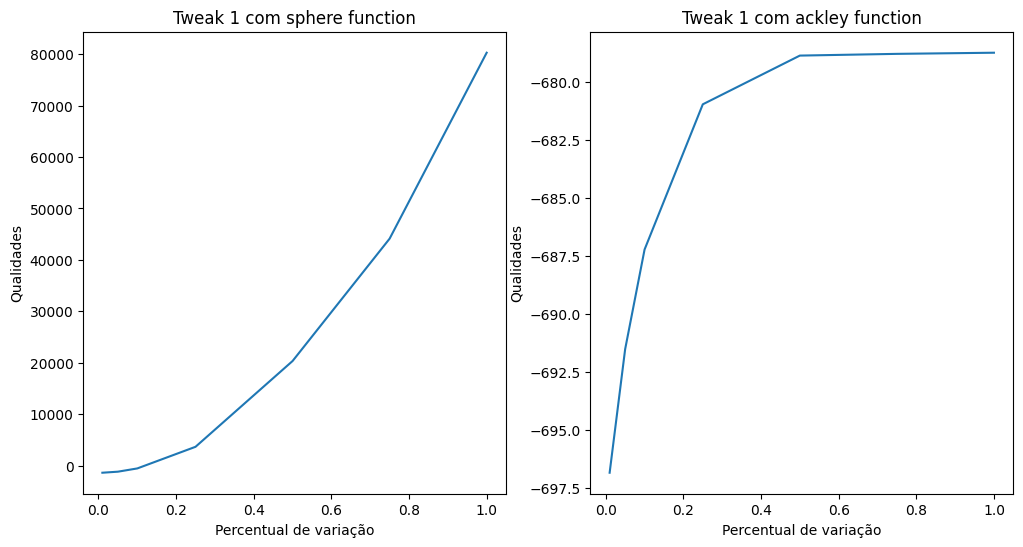

In [4]:
def plota(q1, q2, perc, i, x_label):
    def p(qualities, perc, title, x_label):
        plt.title(title)
        plt.plot(perc, qualities)
        plt.ylabel('Qualidades')
        plt.xlabel(x_label)
        
    plt.figure(figsize = ((12, 6)))
    plt.subplot(1,2,1)
    p(q1, perc, 'Tweak ' + i + ' com sphere function', x_label)
    plt.subplot(1,2,2)
    p(q2, perc, 'Tweak ' + i + ' com ackley function', x_label)
    plt.show()


#Parametros utilizados nos testes
perc = [1, 0.75, 0.5, 0.25, 0.10, 0.05, 0.01]
min = -100    
max = 100
d = 50
q1 = []

#Utilizando a sphere_function
for p in perc:
    res, qRes = hill_climbing(100_000, p, None, None, min, max, d, 1, sphere_function)
    q1.append(qRes)

#Utilizando a ackley_function
q2 = []
for p in perc:
    res, qRes = hill_climbing(100_000, p, None, None, min, max, d, 1, ackley_function)
    q2.append(qRes)

plota(q1, q2, perc, '1', 'Percentual de variação')

#### Casos de teste, utilizando a segunda versão do Tweak

Foi utilizado uma matriz com alguns valores para o raio e a probabilidade, com isso foi feito o hill_climbing para encontrar qual seria a melhor combinação de raio e probabilidade para gerar a qualidade mais próxima do ótimo.

Com a melhor combinação encontrada anteriormente foi realizado um teste com quantidade de iterações variáveis para montar um gráfico Qualidade x Número de iterações. Isso foi feito utilizando ambas as funções de Qualidade definidas anteriormente.

Melhor combinação usando a Sphere Function encontrada: raio = 1, probabilidade = 0.1

Matriz raio x probabilidade:
            0.10         0.25          0.50          0.75          1.00
1  -1399.975547 -1398.486064  -1394.472147  -1389.377455  -1388.936591
2  -1399.906231 -1394.577159  -1379.760750  -1364.925423  -1351.695189
5  -1399.807834 -1354.844432  -1265.628576  -1173.490266  -1056.560838
10 -1398.657482 -1247.155148   -940.647107   -498.124984     47.257609
20 -1393.787889  -842.139402   1082.647020   2023.950583   4627.591192
30 -1388.242382   263.029914   3485.729981   6494.413465  10958.867178
50 -1372.032122  2013.683696  11916.306658  16636.063570  31150.869365 


Melhor combinação usando a Ackley Function encontrada: raio = 50, probabilidade = 0.1

Matriz raio x probabilidade:
           0.10        0.25        0.50        0.75        1.00
1  -679.996348 -679.659650 -679.261580 -678.967190 -678.857878
2  -679.997105 -679.668068 -679.172061 -678.987160 -678.766238
5  -679

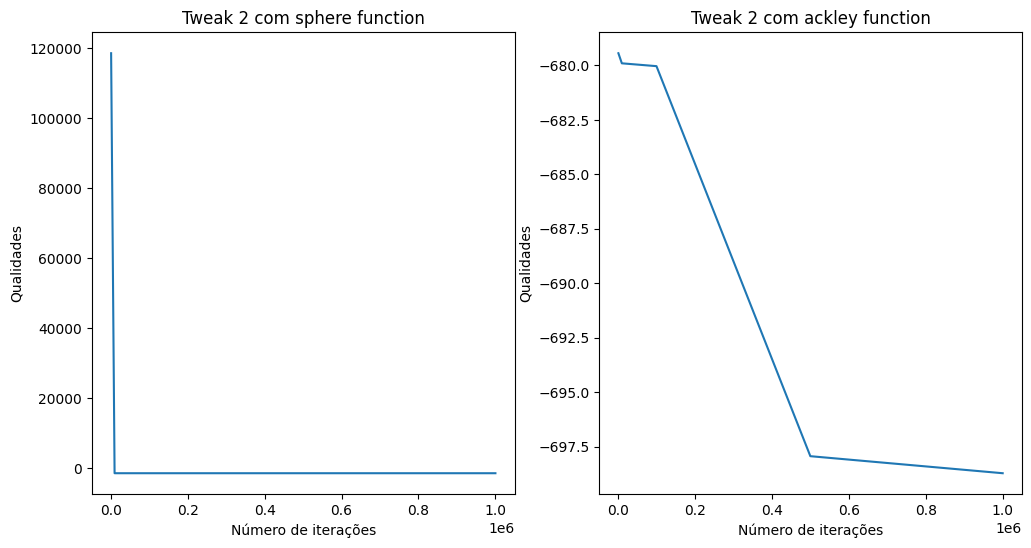

In [5]:
def grid_search(Quality, climbing):
    parametros = {'raio': [1, 2, 5, 10, 20, 30, 50],
                  'prob': [0.1, 0.25, 0.5, 0.75, 1]}
    best_res = None
    q_best = float(np.inf)
    best_comb = None
    i=0
    matriz_res = []
    for r in parametros['raio']:
        linha = []
        for p in parametros['prob']:
            res, quality = climbing(100_000, 1, p, r, min, max, d, 2, Quality)
            linha.append(quality)
            #print(i, '...', end=' ')
            i+=1
            if quality < q_best:
                q_best = quality
                best_res = res
                best_comb = (r, p)
        matriz_res.append(linha)
    matriz_res = DataFrame(matriz_res, columns = parametros['prob'], index = parametros['raio'])
    #print(q_best, best_res)
    return best_comb, matriz_res

def itera_teste(conf, Quality, iteracoes, climbing):
    r, p = conf
    qualities = []
    for i in iteracoes:
        res, quality = climbing(i, 1, p, r, min, max, d, 2, Quality)
        qualities.append(quality)
    return qualities

iteracoes = [1_000, 10_000, 100_000, 500_000, 1_000_000]
best_sphere, m_sphere = grid_search(sphere_function, hill_climbing)
print(f"Melhor combinação usando a Sphere Function encontrada: raio = {best_sphere[0]}, probabilidade = {best_sphere[1]}")
print('\nMatriz raio x probabilidade:\n', m_sphere, '\n\n')

best_ackley, m_ackley = grid_search(ackley_function, hill_climbing)
print(f"Melhor combinação usando a Ackley Function encontrada: raio = {best_ackley[0]}, probabilidade = {best_ackley[1]}")
print('\nMatriz raio x probabilidade:\n', m_ackley, '\n\n')

sphere = itera_teste(best_sphere, sphere_function, iteracoes, hill_climbing)
ackley = itera_teste(best_ackley, ackley_function, iteracoes, hill_climbing)

plota(sphere, ackley, iteracoes, '2', 'Número de iterações')

#### Implementação do Simulated Annealing

Implementação do algoritmo Simulated Annealing, a temperatura t foi inicialmente escolhida como sendo 5 * número de iterações. A função de decremento diminui a variável por 5 a cada iteração, dessa maneira no final da iteração a temperatura se aproxima cada vez mais de zero.

In [12]:
def simulated_annealing(n, perc, prob, r, min, max, d, tweak, Quality):
    t = n / 50 + 1
    S = np.random.uniform(min * perc, max * perc, d)
    qS = Quality(S)
    best = S
    qBest = qS
    for _ in range(n):
        if t <= 0:
            break
        R = Tweak_two(min, max, r, prob, d, np.copy(S))
        qR = Quality(R)
        if qR < qS or np.random.rand() < np.exp((qS - qR) / t):
            S = R
            qS = qR
        t = decrease(t)
        if qS < qBest:
            qBest = qS
            best = S
    return S, qS

def decrease(x):
    return x - 1/50

#### Testes do Simulated Annealing

Os testes foram feitos levando em consideração somente a segunda versão do Tweak. 

Os testes são iguais aos do Hill Climbing, primeiro uma grid search para encontrar a melhor combinação de raio e probabilidade, depois usando essa melhor combinação foi feito uma variação entre o número de iterações para construir o mesmo gráfico Qualidade x Número de iterações.

Melhor combinação usando a Sphere Function encontrada: raio = 2, probabilidade = 0.1

Matriz raio x probabilidade:
            0.10         0.25          0.50          0.75          1.00
1  -1248.634497 -1346.924214  -1299.093702  -1330.297943  -1323.595590
2  -1354.860940 -1293.177204  -1267.760701  -1243.481967  -1221.870060
5  -1236.733556 -1197.387846  -1111.904333   -814.260423   -776.114776
10 -1152.898209  -725.326194   -454.051879    118.070150    691.527454
20  -711.650351   259.313100   1665.094299   3161.663451   5593.364241
30  -646.468882  1758.414864   4780.919605   9732.360391  11699.434250
50   -10.986312  4844.862651  14883.601791  22713.298242  29023.901853 


Melhor combinação usando a Ackley Function encontrada: raio = 1, probabilidade = 0.5

Matriz raio x probabilidade:
           0.10        0.25        0.50        0.75        1.00
1  -678.376733 -678.301996 -678.500311 -678.474327 -678.351964
2  -678.371781 -678.239212 -678.399926 -678.164721 -678.316450
5  -678.

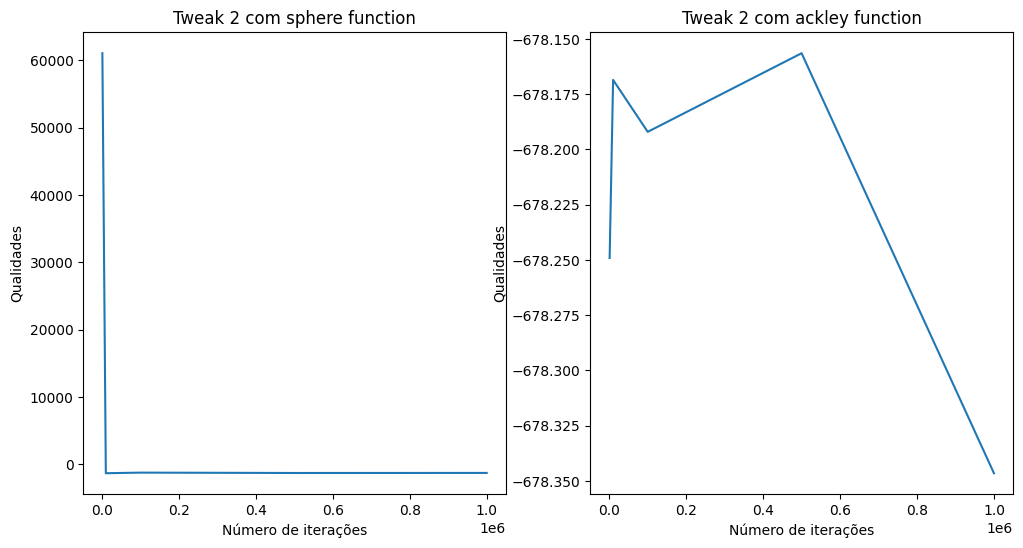

In [13]:
best_sphere, m_sphere = grid_search(sphere_function, simulated_annealing)
print(f"Melhor combinação usando a Sphere Function encontrada: raio = {best_sphere[0]}, probabilidade = {best_sphere[1]}")
print('\nMatriz raio x probabilidade:\n', m_sphere, '\n\n')

best_ackley, m_ackley = grid_search(ackley_function, simulated_annealing)
print(f"Melhor combinação usando a Ackley Function encontrada: raio = {best_ackley[0]}, probabilidade = {best_ackley[1]}")
print('\nMatriz raio x probabilidade:\n', m_ackley, '\n\n')

sphere = itera_teste(best_sphere, sphere_function, iteracoes, simulated_annealing)
ackley = itera_teste(best_ackley, ackley_function, iteracoes, simulated_annealing)

plota(sphere, ackley, iteracoes, '2', 'Número de iterações')

# Algoritmos genéticos
Inicialmente foi criado uma classe Individuo para dar um nível maior de encapsulamento, cada individuo possui um vetor de tamanho d e o seu valor de fitness.

In [1]:
class Individuo:
    def __init__(self, vetor, fitness):
        self.vetor = vetor
        self.fitness = fitness(self.vetor)
    def __lt__(self, other):
        return self.fitness < other.fitness

#Função para criar um individuo aleatório, com valores variando entre min e max
def random_individual(min, max, d, fitness):
    vetor = np.random.uniform(min, max, d)
    return Individuo(vetor, fitness)

Como mecanismo de seleção foi implementado o Tournament Selection. E o cruzamento foi feito pelo TwoPoint Crossover.

In [5]:
import random

def tournament_selection(P, t):
    #Escolhe t individuos aleatórios da população
    individual = random.choices(P, k=t)
    #Retorna o individuo com o melhor fitness
    winner = min(individual)
    return winner

def two_point_crossover(v, w):
    c = random.randint(1, len(v.vetor))
    d = random.randint(1, len(v.vetor))

    if c > d:
        c, d = d, c
    if c != d:
        for i in range(c, d):
            v.vetor[i], w.vetor[i] = w.vetor[i], v.vetor[i]
    return v, w 

Implementação do algoritmo genético com elitismo, algoritmo 33 do Essentials of Metaheuristics.

In [2]:
def genetic_algorithm(popsize, n, min, max, fitness, x, r, p):
    d = popsize
    P = []
    for _ in range(popsize):
        P.append(random_individual(min, max, d, fitness)) 
    Best = None
    
    for _ in range(x):
        for Pi in P:
            if Best == None or Pi.fitness < Best.fitness:
                Best = Pi
        #Seleciona os n melhores individuos
        Q = P.copy()
        Q.sort(key=lambda x: x.fitness)
        Q = Q[:n]

        for _ in range((popsize-n)//2):
            #Seleção dos pais
            Pa = tournament_selection(P, 3)    #Foi usado t=3 no tournament_selection
            Pb = tournament_selection(P, 3)
            Ca, Cb = two_point_crossover(Pa, Pb)
            #Modificação dos filhos usando o Tweak 
            Q.append(Individuo(Tweak_two(min, max, r, p, d, Ca.vetor), fitness))
            Q.append(Individuo(Tweak_two(min, max, r, p, d, Cb.vetor), fitness))
        P = Q.copy()
    return Best

### Testes
Foram feitos testes utilizando apenas a segunda versão do Tweak, a configuração de raio e probabilidade adota foram as melhores encontradas no algoritmo de HillClimbing.

O teste foi feito usando 10, 25, 50 e 100 mil iterações.

Para a Sphere Function foi usado raio = 1 e probabilidade = 0.1.

Resultados com Sphere Function:
[88817.52183690992, 84995.70670857436, 81409.4995990329, 78686.66132055093]


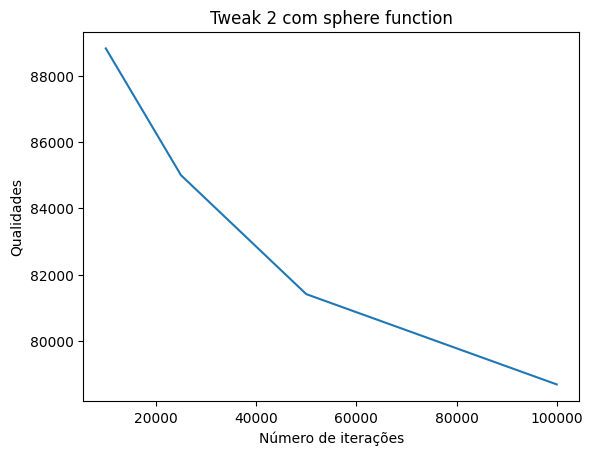

In [8]:
def itera_dois(r, p, fitness, iteracoes):
    res = []
    for i in iteracoes:
        best = genetic_algorithm(50, 10, -100, 100, fitness, i, r, p)
        res.append(best)
    return res 

def plot(title, fitness, iteracoes):
    plt.title(title)
    plt.plot(iteracoes, fitness)
    plt.ylabel('Qualidades')
    plt.xlabel('Número de iterações')
    plt.show()

iteracoes = [10_000, 25_000, 50_000, 100_000]
#Sphere_function
print("Resultados com Sphere Function:")
sph = itera_dois(1, 0.1, sphere_function, iteracoes)
fit_sph = [x.fitness for x in sph]
print(fit_sph)
plot('Tweak 2 com sphere function', fit_sph, iteracoes)

Para a Ackley Function foi usado raio = 50 e probabilidade = 0.1. As iterações foram as mesmas de antes.

Resultados com Ackley Function:
[-678.9097258501105, -678.852896612568, -678.9040481391679, -678.907583483047]


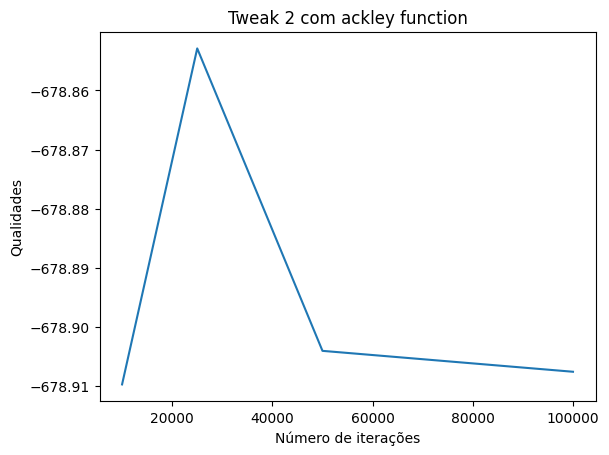

In [10]:
print("Resultados com Ackley Function:")
#Ackley_function
ack = itera_dois(50, 0.1, ackley_function, iteracoes)
fit_ack = [x.fitness for x in ack]
print(fit_ack)
plot('Tweak 2 com ackley function', fit_ack, iteracoes)